<a href="https://colab.research.google.com/github/abdellah-idris/NLI/blob/master/lets_do_final_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [42]:
df = pd.read_csv( 'train.txt',sep = '\t')

In [43]:
df.head(1)

,"(GER) IThe importance and popularity of travelling is still raising , Everybody is interested in getting to know other countries and continents but the ways how to do it , are very differently . I agree with the statement that it is the best way to travel in a group led by a tour guide . If you travel in a group and you have a tour guide you get to know the most famous places and you get to know interesting things about the country you decided to visit . The tour guide would organise everything for you , so the only thing you would have to do is to go to the appointments with the group . Another aspect is that you would get to know a lot of interesting people . When you travel in a group it is very easy to get to know other people because usually you sit in the same bus or you sleep in the same hotel like the others do . That is why you are never borring when you travel in groups . If you decide to travel in a group and you visit a country which is dangerouses then the tour guide can inform you about this dangerouses and he can say you how to avoid risks . Sometimes there are special rules or other things which can bring you in trouble when you do not follow them . Furthermore a tour guide can help you with communication problems . When you are not able to speak the language people in the country you visit speak , then the tour guide can help you because he has to be able to speak it . So if you have to visit the doctor or you have to go to the police because something happended to you , then you can ask your tour guide and he would be able to help you . These are the reasons why I prefer to tavel in a group with a tour guide ."
0,"(TUR) It is an important decision , how to pla..."


In [44]:
import re

def extract_country_and_text(row):
    match = re.match(r'\((.*?)\)(.*)', row)
    if match:
        country_code = match.group(1)
        text = match.group(2)
        return pd.Series([country_code, text])
    else:
        return pd.Series(['', row])

df[['country_code', 'text']] = df.iloc[:, 0].apply(extract_country_and_text)

df['country_code'].value_counts()

TUR    900
CHI    900
TEL    900
ARA    900
SPA    900
HIN    900
JPN    900
KOR    900
FRE    900
ITA    900
GER    899
Name: country_code, dtype: int64

In [45]:
df_pre_train = df[['text', 'country_code']]

In [46]:
df_pre_train['country_code'].value_counts()

TUR    900
CHI    900
TEL    900
ARA    900
SPA    900
HIN    900
JPN    900
KOR    900
FRE    900
ITA    900
GER    899
Name: country_code, dtype: int64

In [47]:
df_pre_train['nb_words'] = df_pre_train['text'].str.split().apply(len)

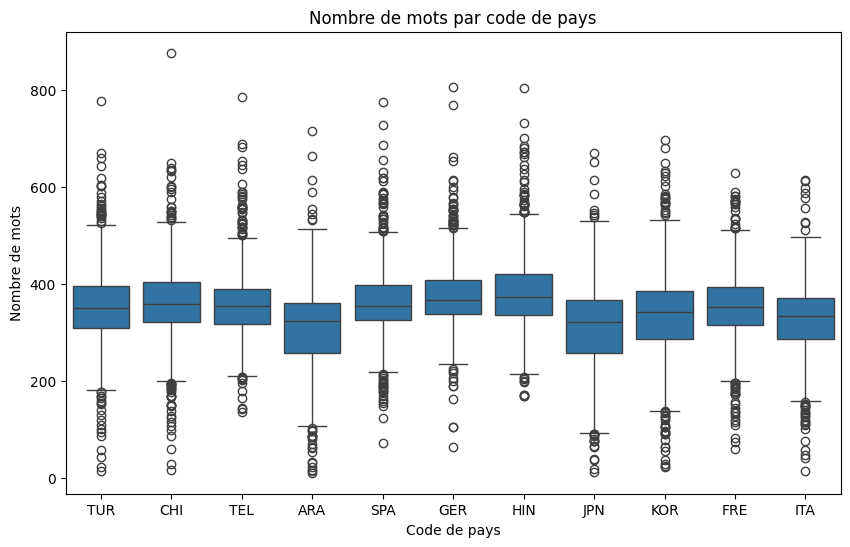

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


# Tracez la boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(x='country_code', y='nb_words', data=df_pre_train)
plt.title('Nombre de mots par code de pays')
plt.xlabel('Code de pays')
plt.ylabel('Nombre de mots')
plt.show()


In [49]:
df_pre_train['unique_word_count'] = df_pre_train['text'].apply(lambda x: len(set(x.split())))

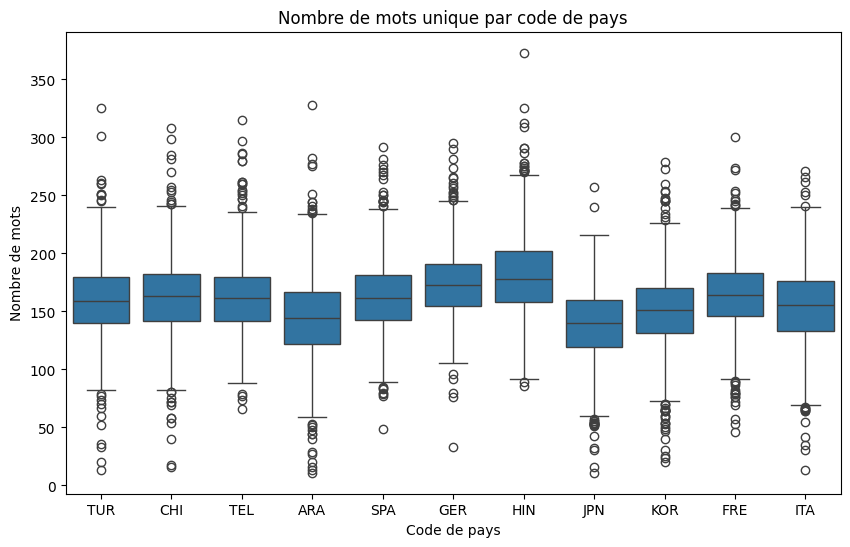

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# Tracez la boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(x='country_code', y='unique_word_count', data=df_pre_train)
plt.title('Nombre de mots unique par code de pays')
plt.xlabel('Code de pays')
plt.ylabel('Nombre de mots')
plt.show()


In [51]:
!pip install pyspellchecker

from spellchecker import SpellChecker
import re
# Fonction pour compter les fautes d'orthographe dans un texte
spell = SpellChecker()

def count_spelling_errors(text):

    # Utiliser une expression régulière pour trouver tous les mots dans le texte
    words = re.findall(r'\b\w+\b', text.lower())

    # Trouver les mots mal orthographiés
    misspelled = spell.unknown(words)
    return len(misspelled)

# Calcul du nombre de fautes d'orthographe pour chaque texte
df_pre_train['spelling_errors'] = df_pre_train['text'].apply(count_spelling_errors)

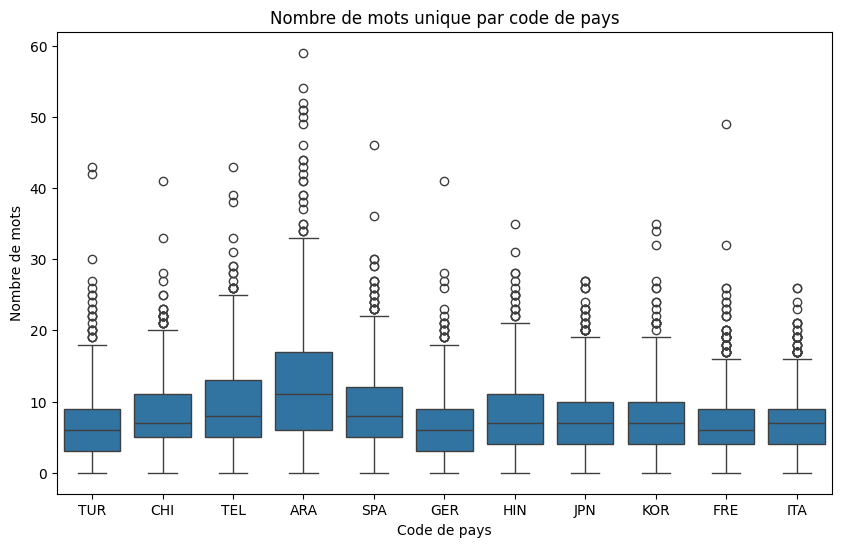

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


# Tracez la boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(x='country_code', y='spelling_errors', data=df_pre_train)
plt.title('Nombre de mots unique par code de pays')
plt.xlabel('Code de pays')
plt.ylabel('Nombre de mots')
plt.show()


In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Téléchargez les ressources nécessaires pour NLTK
nltk.download('vader_lexicon')

# Initialisez l'analyseur de sentiment
sid = SentimentIntensityAnalyzer()

# Appliquez l'analyseur de sentiment à chaque texte et créez une nouvelle colonne "sentiment" dans le DataFrame
df_pre_train['sentiment'] = df_pre_train['text'].apply(lambda x: 'positif' if sid.polarity_scores(x)['compound'] >= 0 else 'négatif')

# Affichez le DataFrame avec la nouvelle colonne ajoutée
df_pre_train.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,country_code,nb_words,unique_word_count,spelling_errors,sentiment
0,"It is an important decision , how to plan you...",TUR,395,196,2,positif
1,Some people believe that young people can enj...,CHI,401,167,3,positif
2,Travelling is usually considered as good recr...,TEL,362,149,8,positif
3,i agree that . Life is a person live period o...,ARA,187,86,9,positif
4,"In my opinion , travel in group with a tour g...",SPA,378,137,7,positif


In [54]:
df_pre_train['sentiment'].value_counts()

positif    9256
négatif     643
Name: sentiment, dtype: int64

In [55]:
# Groupez les données par pays et calculez le nombre de textes positifs et négatifs
sentiment_counts = df_pre_train.groupby(['country_code', 'sentiment']).size().unstack(fill_value=0)

# Affichez le nombre de textes positifs et négatifs pour chaque pays
print(sentiment_counts)


sentiment     négatif  positif
country_code                  
ARA                63      837
CHI                54      846
FRE                60      840
GER                42      857
HIN                35      865
ITA                66      834
JPN                88      812
KOR                84      816
SPA                43      857
TEL                36      864
TUR                72      828


In [56]:
df_pre_train.head()

,text,country_code,nb_words,unique_word_count,spelling_errors,sentiment
0,"It is an important decision , how to plan you...",TUR,395,196,2,positif
1,Some people believe that young people can enj...,CHI,401,167,3,positif
2,Travelling is usually considered as good recr...,TEL,362,149,8,positif
3,i agree that . Life is a person live period o...,ARA,187,86,9,positif
4,"In my opinion , travel in group with a tour g...",SPA,378,137,7,positif


In [57]:
from sklearn.preprocessing import LabelEncoder

# Supposons que votre variable catégorielle est contenue dans la colonne 'sentiment' de votre DataFrame df

# Initialisez l'encodeur de label
label_encoder = LabelEncoder()

# Appliquez l'encodeur de label à la variable catégorielle
df_pre_train['sentiment_encoded'] = label_encoder.fit_transform(df_pre_train['sentiment'])
df_pre_train.head()


,text,country_code,nb_words,unique_word_count,spelling_errors,sentiment,sentiment_encoded
0,"It is an important decision , how to plan you...",TUR,395,196,2,positif,1
1,Some people believe that young people can enj...,CHI,401,167,3,positif,1
2,Travelling is usually considered as good recr...,TEL,362,149,8,positif,1
3,i agree that . Life is a person live period o...,ARA,187,86,9,positif,1
4,"In my opinion , travel in group with a tour g...",SPA,378,137,7,positif,1


In [58]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Initialisez le vectorizer avec les paramètres spécifiés
# vectorizer_BOW_bigram = CountVectorizer(ngram_range=(1, 2))

# # Ajustez et transformez les données textuelles pour créer la matrice de caractéristiques
# X_BOW_bigram = vectorizer_BOW_bigram.fit_transform(df_pre_train['text'])

# # Créez un DataFrame à partir de la matrice de caractéristiques
# df_bow_bigram = pd.DataFrame(X_BOW_bigram.toarray(), columns=vectorizer_BOW_bigram.get_feature_names_out())

# # Concaténez le DataFrame original avec le nouveau DataFrame contenant les caractéristiques extraites
# df_train = pd.concat([df_pre_train, df_bow_bigram], axis=1)

# # Affichez le DataFrame avec la nouvelle colonne à partir des bigrammes
# print(df_train)


In [59]:
def create_group(df):
  # Créez une nouvelle colonne 'Country_Code_New4' en copiant 'Country_Code'
  df['group'] = df['country_code']

  df.loc[df['country_code'].isin(['TEL', 'HIN']), 'group']  = 'HIN+TEL'
  df.loc[df['country_code'].isin(['KOR', 'CHI','JPN']), 'group'] = 'KOR+CHI+JPN'
  df.loc[df['country_code'].isin(['FRE', 'SPA','ITA','GER']), 'group'] = 'FRE+SPA+ITA+GER'
  df.loc[df['country_code'].isin(['ARA', 'TUR']), 'group'] = 'ARA+TUR'

  return df

df_pre_train = create_group(df_pre_train)
df_pre_train.head()

,text,country_code,nb_words,unique_word_count,spelling_errors,sentiment,sentiment_encoded,group
0,"It is an important decision , how to plan you...",TUR,395,196,2,positif,1,ARA+TUR
1,Some people believe that young people can enj...,CHI,401,167,3,positif,1,KOR+CHI+JPN
2,Travelling is usually considered as good recr...,TEL,362,149,8,positif,1,HIN+TEL
3,i agree that . Life is a person live period o...,ARA,187,86,9,positif,1,ARA+TUR
4,"In my opinion , travel in group with a tour g...",SPA,378,137,7,positif,1,FRE+SPA+ITA+GER


In [60]:
groups_mapping= {'HIN+TEL':0, 'KOR+CHI+JPN':1, 'FRE+SPA+ITA+GER':2,'ARA+TUR':3}

In [61]:
df_pre_train['group'].map(groups_mapping)

0       3
1       1
2       0
3       3
4       2
       ..
9894    1
9895    1
9896    2
9897    0
9898    1
Name: group, Length: 9899, dtype: int64

In [62]:
df_pre_train.head()

,text,country_code,nb_words,unique_word_count,spelling_errors,sentiment,sentiment_encoded,group
0,"It is an important decision , how to plan you...",TUR,395,196,2,positif,1,ARA+TUR
1,Some people believe that young people can enj...,CHI,401,167,3,positif,1,KOR+CHI+JPN
2,Travelling is usually considered as good recr...,TEL,362,149,8,positif,1,HIN+TEL
3,i agree that . Life is a person live period o...,ARA,187,86,9,positif,1,ARA+TUR
4,"In my opinion , travel in group with a tour g...",SPA,378,137,7,positif,1,FRE+SPA+ITA+GER


In [63]:
from sklearn.model_selection import train_test_split

# X= df_train[['nb_words', 'unique_word_count', 'spelling_errors', 'sentiment_encoded', 'word_embeddings' ]]
X= df_pre_train[['text', 'spelling_errors', 'unique_word_count', ]] # ' nb_words', 'sentiment_encoded'

y = df_pre_train[['group']]

In [64]:
vectorizer_BOW = CountVectorizer(ngram_range=(1,2))

In [65]:
import numpy as np

In [66]:
X['text']

0        It is an important decision , how to plan you...
1        Some people believe that young people can enj...
2        Travelling is usually considered as good recr...
3        i agree that . Life is a person live period o...
4        In my opinion , travel in group with a tour g...
                              ...                        
9894     Nowadays , more and more people go abroad , n...
9895     In accomplishing something that is risky come...
9896     At the beginning of the 21st century , the in...
9897     The number of cars in use across the world ha...
9898     Many people think it is betters to have borad...
Name: text, Length: 9899, dtype: object

In [67]:
# BOW
X_bow = vectorizer_BOW.fit_transform(X['text'])

In [68]:
# Numerical features
X_train_numeric_bow = X[['spelling_errors', 'unique_word_count', ]].values # 'nb_words', 'sentiment_encoded'
# Combine text and numerical features
# X_train_combined_bow = np.hstack((X_bow.toarray(), X_train_numeric_bow))

In [69]:
from scipy.sparse import hstack

# Combine sparse matrices
X_train_combined_bow = hstack((X_bow, X_train_numeric_bow))

In [70]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Supposons que X contient vos caractéristiques et y contient vos étiquettes

# # Définissez les hyperparamètres que vous souhaitez rechercher
# rf_param_grid = {
#     'n_estimators': [500],
#     'max_depth': [10],
#     'min_samples_split': [5],
#     'max_features' : ['sqrt' ]
# }

# # Initialisez le classificateur Random Forest
# rf = RandomForestClassifier(random_state=42)

# # Initialisez l'objet GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Ajustez le modèle aux données
# grid_search.fit(X_train, y_train)

# # Affichez les meilleurs paramètres et le meilleur score
# print("Meilleurs paramètres :", grid_search.best_params_)
# print("Meilleur score :", grid_search.best_score_)


# Utils

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

def plot_cross_validation_curve(estimator, X, y, param_grid, title, scoring='accuracy', cv=3):
    grid_search = GridSearchCV(estimator, param_grid, scoring=scoring, cv=cv)
    grid_search.fit(X, y)

    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    params = grid_search.cv_results_['params']

    plt.figure()
    plt.title(title)
    plt.xlabel("Parameter Combinations")
    plt.ylabel("Score")
    plt.grid()

    xticks = [str(params[i]) for i in range(len(params))]
    plt.xticks(rotation=90)

    plt.errorbar(range(len(means)), means, yerr=stds, fmt='o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# train

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Supposons que X contient vos caractéristiques et y contient vos étiquettes

# Définissez les hyperparamètres que vous souhaitez rechercher
lr_param_grid = {
    'penalty': ['l2'], # add elastic net
    'C': [0.01, 10], # ppur reduire l'overfit du modele final add  1, 0.1
    'solver': [ 'saga'],
    'max_iter': [ 1500],
    'n_jobs': [-1],
}

# Initialisez le classificateur de régression logistique
lr_model = LogisticRegression(random_state=42)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_combined_bow, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# import time

# # Create logistic regression model with desired parameters
# lr_model = LogisticRegression(max_iter=1500, n_jobs=-1)

# # Training
# start_time = time.time()
# lr_model.fit(X_train, y_train)
# training_time = (time.time() - start_time) / 60  # Time in minutes

# # Prediction on training set
# start_time = time.time()
# y_train_pred = lr_model.predict(X_train)
# train_prediction_time = (time.time() - start_time) / 60  # Time in minutes

# # Calculate accuracy on training set
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Training Accuracy:", train_accuracy)
# print("Training Time (minutes):", training_time)
# print("Prediction Time on Training Set (minutes):", train_prediction_time)

# # Prediction on test set
# start_time = time.time()
# y_test_pred = lr_model.predict(X_test)
# test_prediction_time = (time.time() - start_time) / 60  # Time in minutes

# # Calculate accuracy on test set
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test Accuracy:", test_accuracy)
# print("Prediction Time on Test Set (minutes):", test_prediction_time)


In [ ]:
plot_cross_validation_curve(lr_model, X_train, y_train.values.ravel(), lr_param_grid, "Logistic Regression Grid search Cross Validation Curve", scoring='accuracy', cv=2)
plt.show()

In [ ]:
# Affichez les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def evaluate_model_performance_detailed(mapping_list, model, model_name, method_name, train, test, y_train, y_test):

    predictions = model.predict(test)
    predictions_train = model.predict(train)


    # Metrics for each label
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average=None)
    metrics_df = pd.DataFrame({'Label': list(mapping_list.keys()),
                               'Precision': precision,
                               'Recall': recall,
                               'F1 Score': f1})

    # Global (macro) metrics
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)

    precision_macro_train , recall_macro_train , f1_macro_train , _ = precision_recall_fscore_support(y_train, predictions_train, average='macro')

    accuracy_train = accuracy_score(y_train, predictions_train)

    print("train-------------------------------------------")
    print(f"{model_name} ({method_name}) - Overall Metrics:\n- Accuracy: {accuracy_train:.4f}\n- Precision (Macro): {precision_macro_train:.4f}\n- Recall (Macro): {recall_macro_train:.4f}\n- F1 (Macro): {f1_macro_train:.4f}\n")

    print("test--------------------------------------------")
    print(f"{model_name} ({method_name}) - Overall Metrics:\n- Accuracy: {accuracy:.4f}\n- Precision (Macro): {precision_macro:.4f}\n- Recall (Macro): {recall_macro:.4f}\n- F1 (Macro): {f1_macro:.4f}\n")

    print(f"{model_name} ({method_name}) - Metrics by Label:")
    print(metrics_df.to_string(index=False))


    cm = confusion_matrix(y_test, predictions)

    # Plotting the confusion matrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', xticklabels=list(mapping_list.keys()), yticklabels=list(mapping_list.keys()))
    plt.title(f"Confusion Matrix - {model_name} ({method_name})")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    return model
